In [1]:
import pandas as pd
import os
import glob


### Task 1: Agrupar os 12 meses em um unico csv

In [2]:
arquivos = glob.glob(os.path.join(r'./Sales_Data', '*.csv'))

arquivo = [pd.read_csv(arquivo) for arquivo in arquivos]
df = pd.concat(arquivo, ignore_index=True)

df.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


### Limpar os dados

O primeiro passo é descobrir o que precisamos limpar, na prática descobrimos o que precisamos limpar quando fazemos algum cálculo e obtemos um erro. Baseado no erro decidimos como podemos limpar os dados.


In [3]:
# encontrando dados vazios
df_vazios = df[df.isna().any(axis=1)]
display(df_vazios.head())

df = df.dropna(how='all')
display(df.head())


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Eliminar o texto da coluna Order Date

In [4]:
df = df[df['Order Date'].str[0:2]!='Or']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [8]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df.info() # imprimindo das informações do dataframe para verificar os ajustes

<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


In [10]:
# Adicionando colunas de meses
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head() # verificando nova coluna

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4


### Adicionar coluna da cidade

In [11]:
def get_city(address):
    return address.split(',')[1].strip(' ')

def get_state(address):
    return address.split(',')[2].strip(' ')

# criando coluna da cidade e endereço
df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')
df.head() # testando a coluna de cidade

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX 75001)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA 02215)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA 90001)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA 90001)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA 90001)


## Explorando os dados

### 1. Qual foi o mês que mais tiveram vendas e quando vendemos nesse mês?

In [16]:
df['Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float')



In [18]:
df.groupby(['Month'])[['Sales', 'Quantity Ordered']].sum()

,Sales,Quantity Ordered
Month,,
1,1822256.73,10903
2,2202022.42,13449
3,2807100.38,17005
4,3390670.24,20558
5,3152606.75,18667
6,2577802.26,15253
7,2647775.76,16072
8,2244467.88,13448
9,2097560.13,13109


range(1, 13)


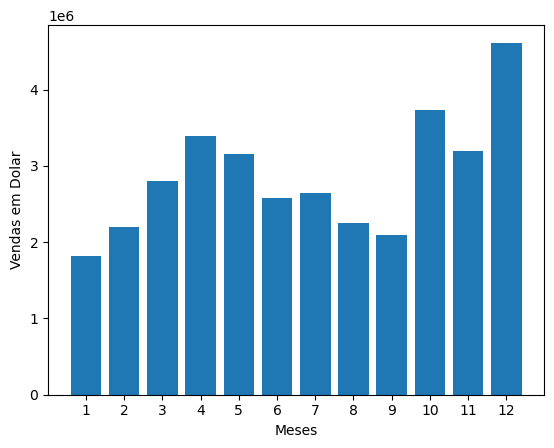

In [20]:
# Importando bibliotecas que faltaram
import matplotlib.pyplot as plt

months = range(1, 13)
print(months)

plt.bar(months, df.groupby(['Month'])['Sales'].sum())
plt.xticks(months)
plt.ylabel('Vendas em Dolar')
plt.xlabel('Meses')
plt.show()

### 2. Qual cidade vendeu mais produtos

In [21]:
df.groupby(['City'])[['Quantity Ordered', 'Sales']].sum()

,Quantity Ordered,Sales
City,,
Atlanta (GA 30301),16602,2795498.58
Austin (TX 73301),11153,1819581.75
Boston (MA 02215),22528,3661642.01
Dallas (TX 75001),16730,2767975.40
Los Angeles (CA 90001),33289,5452570.80
New York City (NY 10001),27932,4664317.43
Portland (ME 04101),2750,449758.27
Portland (OR 97035),11303,1870732.34
San Francisco (CA 94016),50239,8262203.91


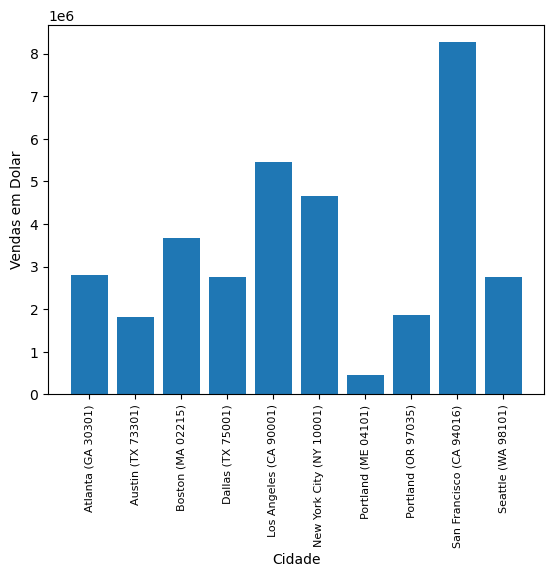

In [25]:
# Agrupando por cidade e somando as vendas em um DataFrame separado para facilitar o acesso
city_sales = df.groupby(['City'])['Sales'].sum()

# Extraindo as chaves (nomes das cidades) e os valores (soma de vendas) separadamente
keys = city_sales.index
values = city_sales.values

# Construindo o gráfico
plt.bar(keys, values)
plt.ylabel('Vendas em Dolar')
plt.xlabel('Cidade')
plt.xticks(keys, rotation='vertical', size=8)
plt.show()


### 3. A que horas devemos exibir anúncios para maximizar a probabilidade de o cliente comprar o produto?

In [26]:
# adicionando coluna de hora
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,Dallas (TX 75001),23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,Boston (MA 02215),99.99,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA 90001),600.00,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles (CA 90001),11.99,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,Los Angeles (CA 90001),11.99,9,27,1


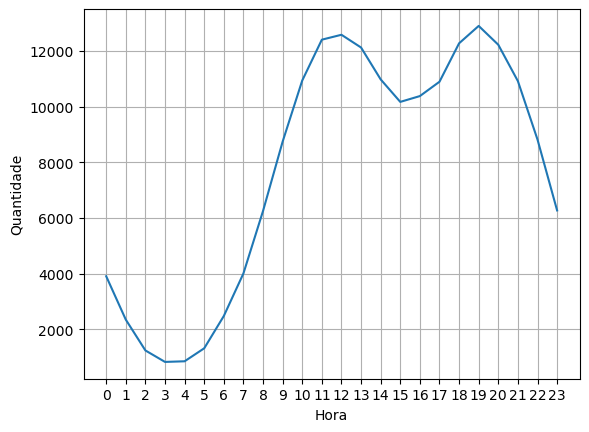

In [28]:
# Obtendo os valores para o eixo x e y
keys = df.groupby('Hour').size().index  # Horas únicas (eixo x)
values = df.groupby('Hour')['Count'].count().values  # Contagem de 'Count' por hora (eixo y)

# Construindo o gráfico
plt.plot(keys, values)
plt.ylabel('Quantidade')
plt.xlabel('Hora')
plt.xticks(keys)
plt.grid()
plt.show()


### 4. Quais produtos foram vendidos juntos mais vezes?

In [30]:
# Filtra os registros duplicados com base na coluna 'Order ID'
df_agrupado = df[df['Order ID'].duplicated(keep=False)]

# Agrupa os produtos por 'Order ID', unindo-os em uma única string separada por vírgulas
df_agrupado['Grouped'] = df_agrupado.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

# Remove duplicatas para obter apenas um registro por 'Order ID'
df2 = df_agrupado[['Order ID', 'Grouped']].drop_duplicates()


C:\Users\filip\AppData\Local\Temp\ipykernel_22272\2218853682.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_agrupado['Grouped'] = df_agrupado.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [31]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### 5. Qual produto vendeu mais?